# 1. Cài đặt thư viện

In [16]:
from ultralytics import YOLO
import kagglehub
import numpy as np 
import pandas as pd 
import os 
import cv2

/workspace/ai_intern/anaconda3/envs/phat/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Tải data từ Kaggle

In [17]:
path = kagglehub.dataset_download("metinmekiabullrahman/fire-detection")

print("Path to dataset files:", path)

100%|██████████| 24.4M/24.4M [00:08<00:00, 3.09MB/s]

Extracting files...


Path to dataset files: /home/ai_intern/.cache/kagglehub/datasets/metinmekiabullrahman/fire-detection/versions/1


# 3. Thiết lập YOLOv8

In [18]:
model = YOLO("yolov8n.pt")

In [20]:
model.train(data="/workspace/ai_intern/PHAT/fire_detection/Fire-Detection/data.yaml", 
            epochs=30)

Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.8.0+cu128 CUDA:0 (NVIDIA RTX A5000, 24248MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/workspace/ai_intern/PHAT/fire_detection/Fire-Detection/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pers

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 11.4±10.2 MB/s, size: 10.2 KB)


train: Scanning /workspace/ai_intern/PHAT/fire_detection/Fire-Detection/train/labels... 1004 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1004/1004 [00:00<00:00, 1510.53it/s]

train: New cache created: /workspace/ai_intern/PHAT/fire_detection/Fire-Detection/train/labels.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 8.5±8.9 MB/s, size: 8.9 KB)


val: Scanning /workspace/ai_intern/PHAT/fire_detection/Fire-Detection/valid/labels... 754 images, 2 backgrounds, 0 corrupt: 100%|██████████| 754/754 [00:00<00:00, 1514.89it/s]


val: New cache created: /workspace/ai_intern/PHAT/fire_detection/Fire-Detection/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.05G      1.494      2.505      1.478         35        640: 100%|██████████| 63/63 [00:13<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.31it/s]


                   all        754        950       0.67      0.346      0.467      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.28G      1.467      1.974      1.466         42        640: 100%|██████████| 63/63 [00:09<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.25it/s]


                   all        754        950      0.431      0.428      0.336      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.28G      1.491      1.816      1.481         16        640: 100%|██████████| 63/63 [00:09<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.62it/s]


                   all        754        950       0.32      0.345       0.28      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.28G      1.526      1.731       1.54         33        640: 100%|██████████| 63/63 [00:09<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.58it/s]


                   all        754        950      0.492      0.512      0.437      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.28G       1.46       1.53      1.458         20        640: 100%|██████████| 63/63 [00:09<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.48it/s]

                   all        754        950      0.585      0.587      0.593      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.28G      1.407      1.472      1.456         39        640: 100%|██████████| 63/63 [00:09<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.80it/s]

                   all        754        950       0.65      0.592      0.625      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.28G       1.39      1.379      1.428         42        640: 100%|██████████| 63/63 [00:09<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.65it/s]


                   all        754        950      0.699      0.723      0.762      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.28G      1.396      1.352      1.413         28        640: 100%|██████████| 63/63 [00:08<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.09it/s]

                   all        754        950      0.744      0.794       0.81      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.28G      1.342      1.281       1.38         32        640: 100%|██████████| 63/63 [00:09<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.95it/s]

                   all        754        950      0.795      0.698      0.788      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.28G      1.321      1.253      1.381         39        640: 100%|██████████| 63/63 [00:09<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.90it/s]

                   all        754        950       0.74      0.715      0.797      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.28G      1.259      1.214      1.333         43        640: 100%|██████████| 63/63 [00:08<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.84it/s]

                   all        754        950      0.806      0.697      0.799      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.28G      1.283      1.214      1.358         28        640: 100%|██████████| 63/63 [00:08<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.96it/s]

                   all        754        950      0.727      0.654       0.74      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.28G      1.221      1.128      1.299         28        640: 100%|██████████| 63/63 [00:08<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.44it/s]


                   all        754        950      0.825      0.712      0.827      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30       2.3G      1.221       1.12      1.309         47        640: 100%|██████████| 63/63 [00:08<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.31it/s]

                   all        754        950      0.793      0.777      0.847      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.31G      1.184      1.089      1.302         49        640: 100%|██████████| 63/63 [00:08<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.53it/s]

                   all        754        950       0.85      0.757      0.853      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.33G      1.174      1.041      1.284         32        640: 100%|██████████| 63/63 [00:09<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.67it/s]

                   all        754        950      0.854      0.708      0.834      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.35G      1.139     0.9917      1.263         27        640: 100%|██████████| 63/63 [00:09<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.82it/s]

                   all        754        950      0.816      0.762      0.835      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.35G      1.126     0.9983      1.254         39        640: 100%|██████████| 63/63 [00:09<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.63it/s]

                   all        754        950      0.728      0.763      0.788      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.35G      1.092     0.9802      1.249         23        640: 100%|██████████| 63/63 [00:09<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.96it/s]

                   all        754        950      0.829      0.777      0.857      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.35G      1.133      0.976       1.26         29        640: 100%|██████████| 63/63 [00:09<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.85it/s]

                   all        754        950      0.871      0.788      0.887      0.618


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.35G      1.049     0.8596      1.216         24        640: 100%|██████████| 63/63 [00:09<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.97it/s]


                   all        754        950      0.816      0.759      0.855      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.35G      1.017     0.8388      1.186         14        640: 100%|██████████| 63/63 [00:08<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.25it/s]

                   all        754        950      0.861      0.763      0.843        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.35G      1.004     0.7895      1.176         20        640: 100%|██████████| 63/63 [00:08<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.27it/s]

                   all        754        950      0.886        0.8      0.893      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.37G     0.9873     0.7549      1.179         22        640: 100%|██████████| 63/63 [00:08<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.91it/s]

                   all        754        950      0.886      0.816        0.9      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.38G     0.9707     0.7602       1.16         15        640: 100%|██████████| 63/63 [00:09<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.89it/s]

                   all        754        950      0.866      0.785      0.874      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.38G     0.9434     0.7224       1.14         13        640: 100%|██████████| 63/63 [00:09<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.61it/s]

                   all        754        950      0.892      0.783      0.873      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.38G     0.9327     0.6889      1.129         21        640: 100%|██████████| 63/63 [00:09<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.67it/s]

                   all        754        950      0.883      0.802      0.881      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.38G     0.8921     0.6668      1.106         16        640: 100%|██████████| 63/63 [00:09<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.77it/s]

                   all        754        950      0.866      0.788      0.866      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.38G     0.8892     0.6384      1.099         20        640: 100%|██████████| 63/63 [00:09<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.97it/s]

                   all        754        950      0.903      0.799      0.879      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.38G     0.8715     0.6282      1.097         28        640: 100%|██████████| 63/63 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.89it/s]

                   all        754        950      0.895      0.802      0.881      0.635



30 epochs completed in 0.153 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.8.0+cu128 CUDA:0 (NVIDIA RTX A5000, 24248MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.31it/s]


                   all        754        950      0.884      0.801      0.881       0.64
Speed: 0.3ms preprocess, 1.3ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f9e781b2dd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# 4. Đánh giá mô hình

In [25]:
from PIL import Image
from IPython.display import display

def show_image(path):
    display(Image.open(path))

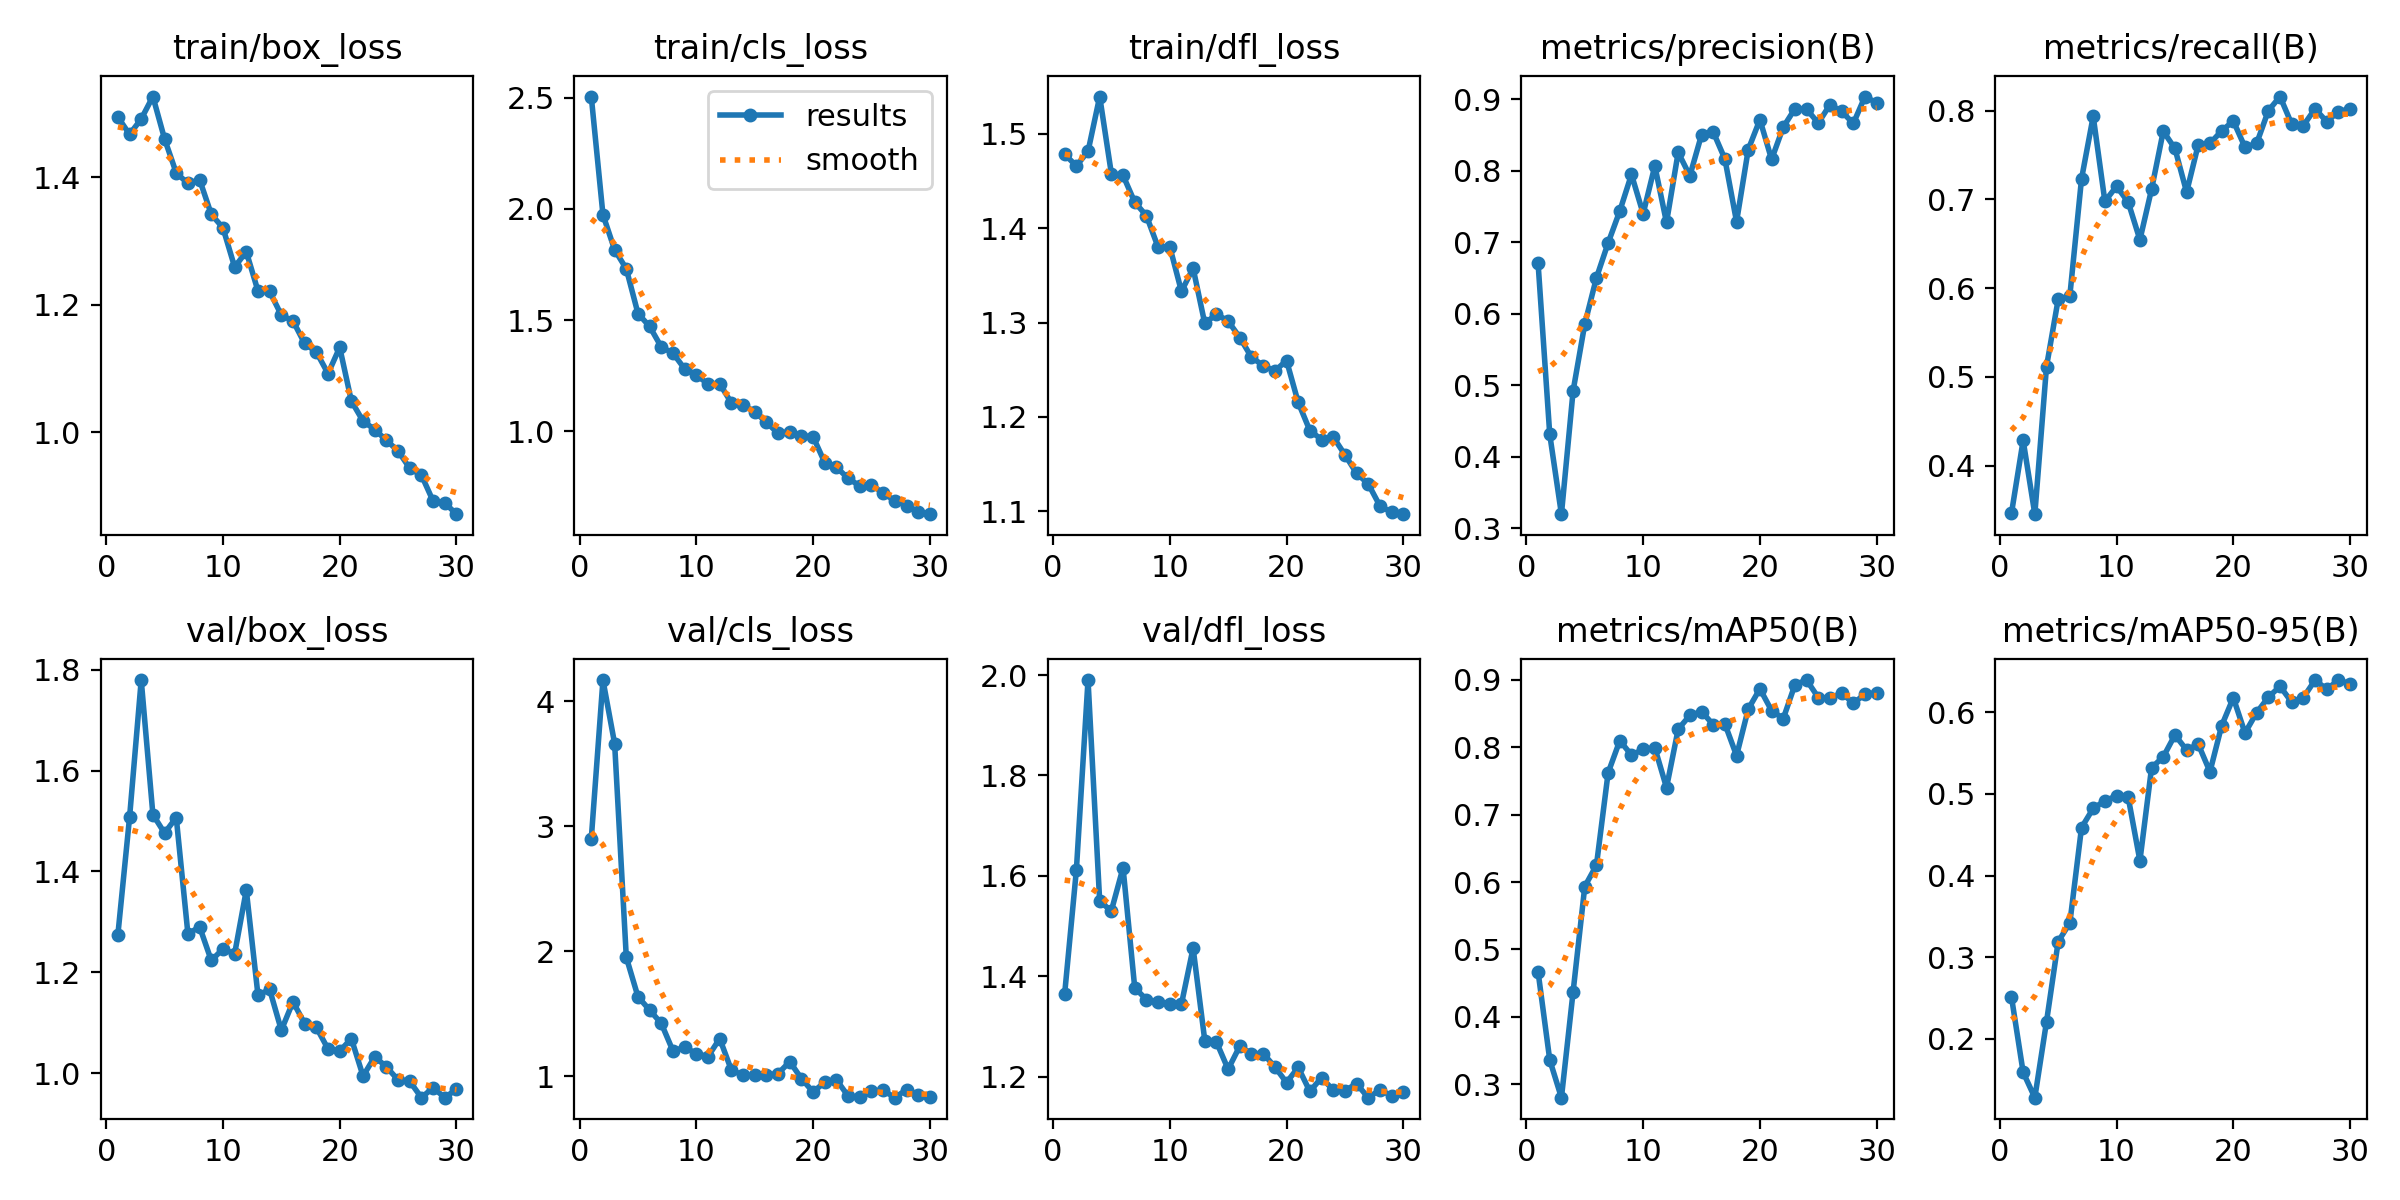

In [26]:
show_image('/workspace/ai_intern/PHAT/fire_detection/runs/detect/train2/results.png')

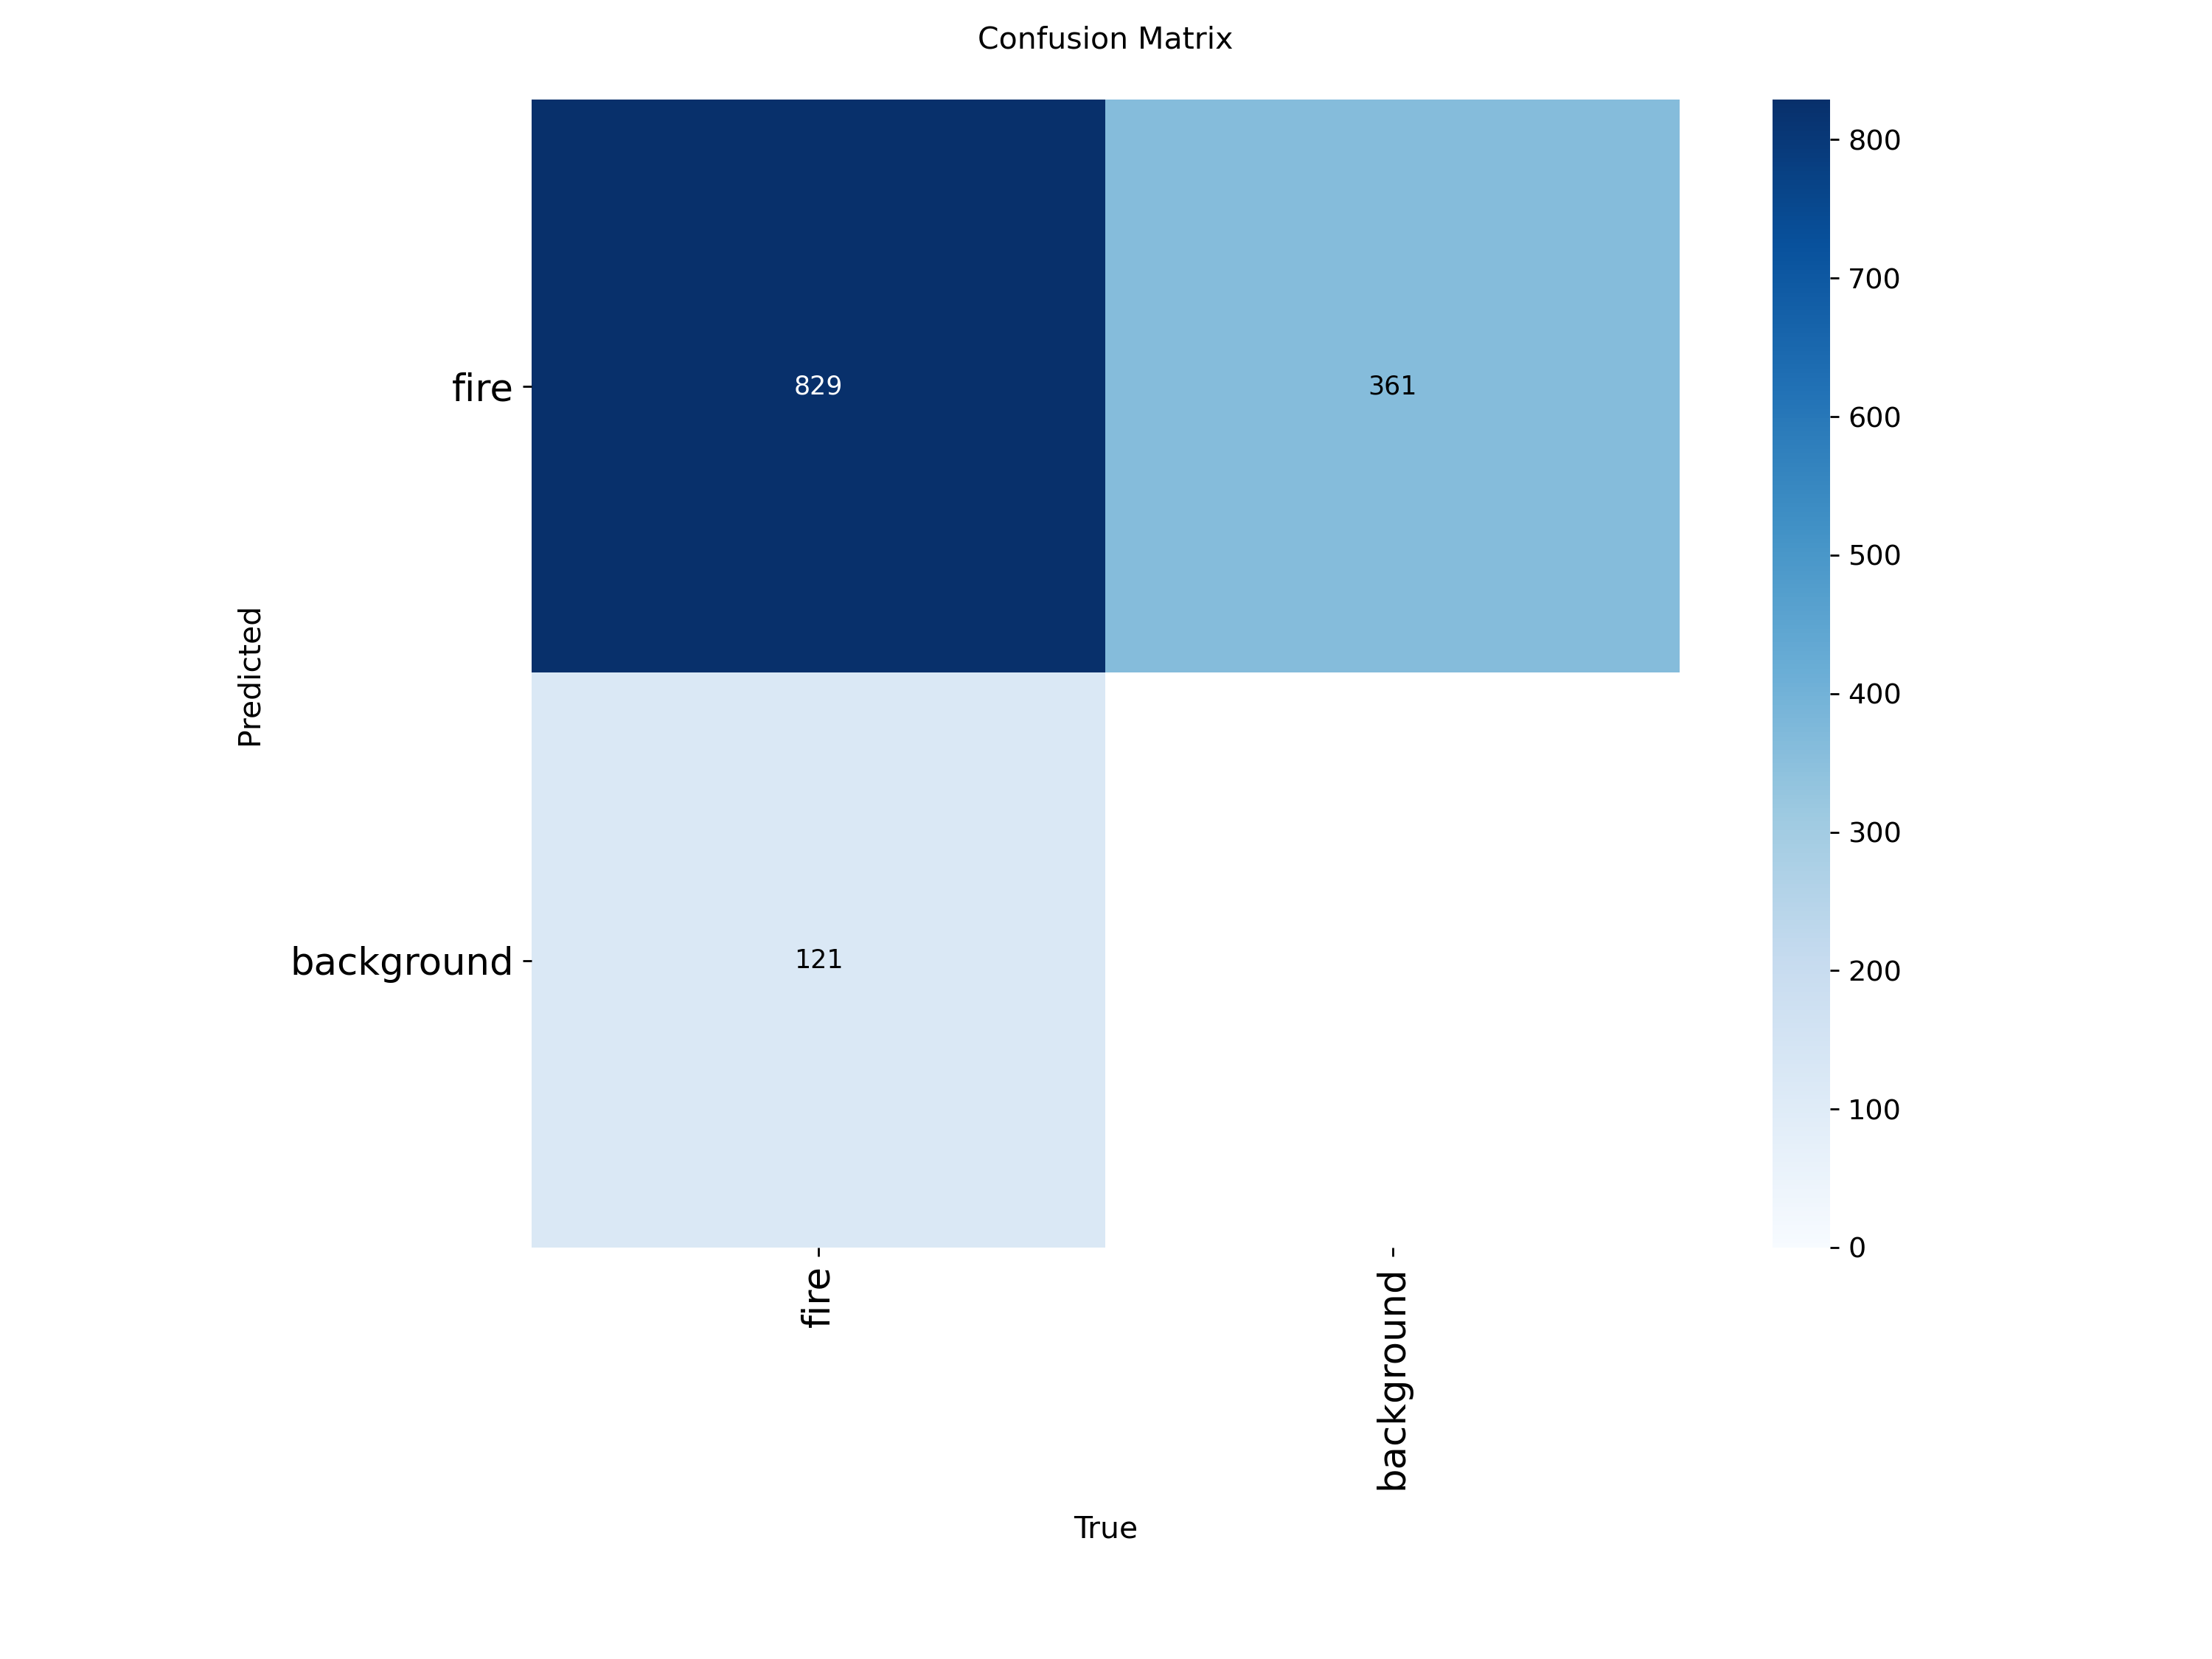

In [27]:
show_image("/workspace/ai_intern/PHAT/fire_detection/runs/detect/train2/confusion_matrix.png")

# 5. Kiểm thử với tập test

In [28]:
model = YOLO("/workspace/ai_intern/PHAT/fire_detection/runs/detect/train2/weights/best.pt")
model.val(split="test")


Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.8.0+cu128 CUDA:0 (NVIDIA RTX A5000, 24248MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 27.8±8.4 MB/s, size: 8.8 KB)


val: Scanning /workspace/ai_intern/PHAT/fire_detection/Fire-Detection/test/labels... 751 images, 2 backgrounds, 0 corrupt: 100%|██████████| 751/751 [00:00<00:00, 2022.40it/s]

val: New cache created: /workspace/ai_intern/PHAT/fire_detection/Fire-Detection/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:07<00:00,  6.08it/s]


                   all        751        963      0.829      0.789      0.872      0.618
Speed: 1.0ms preprocess, 2.6ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f9d810ee610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

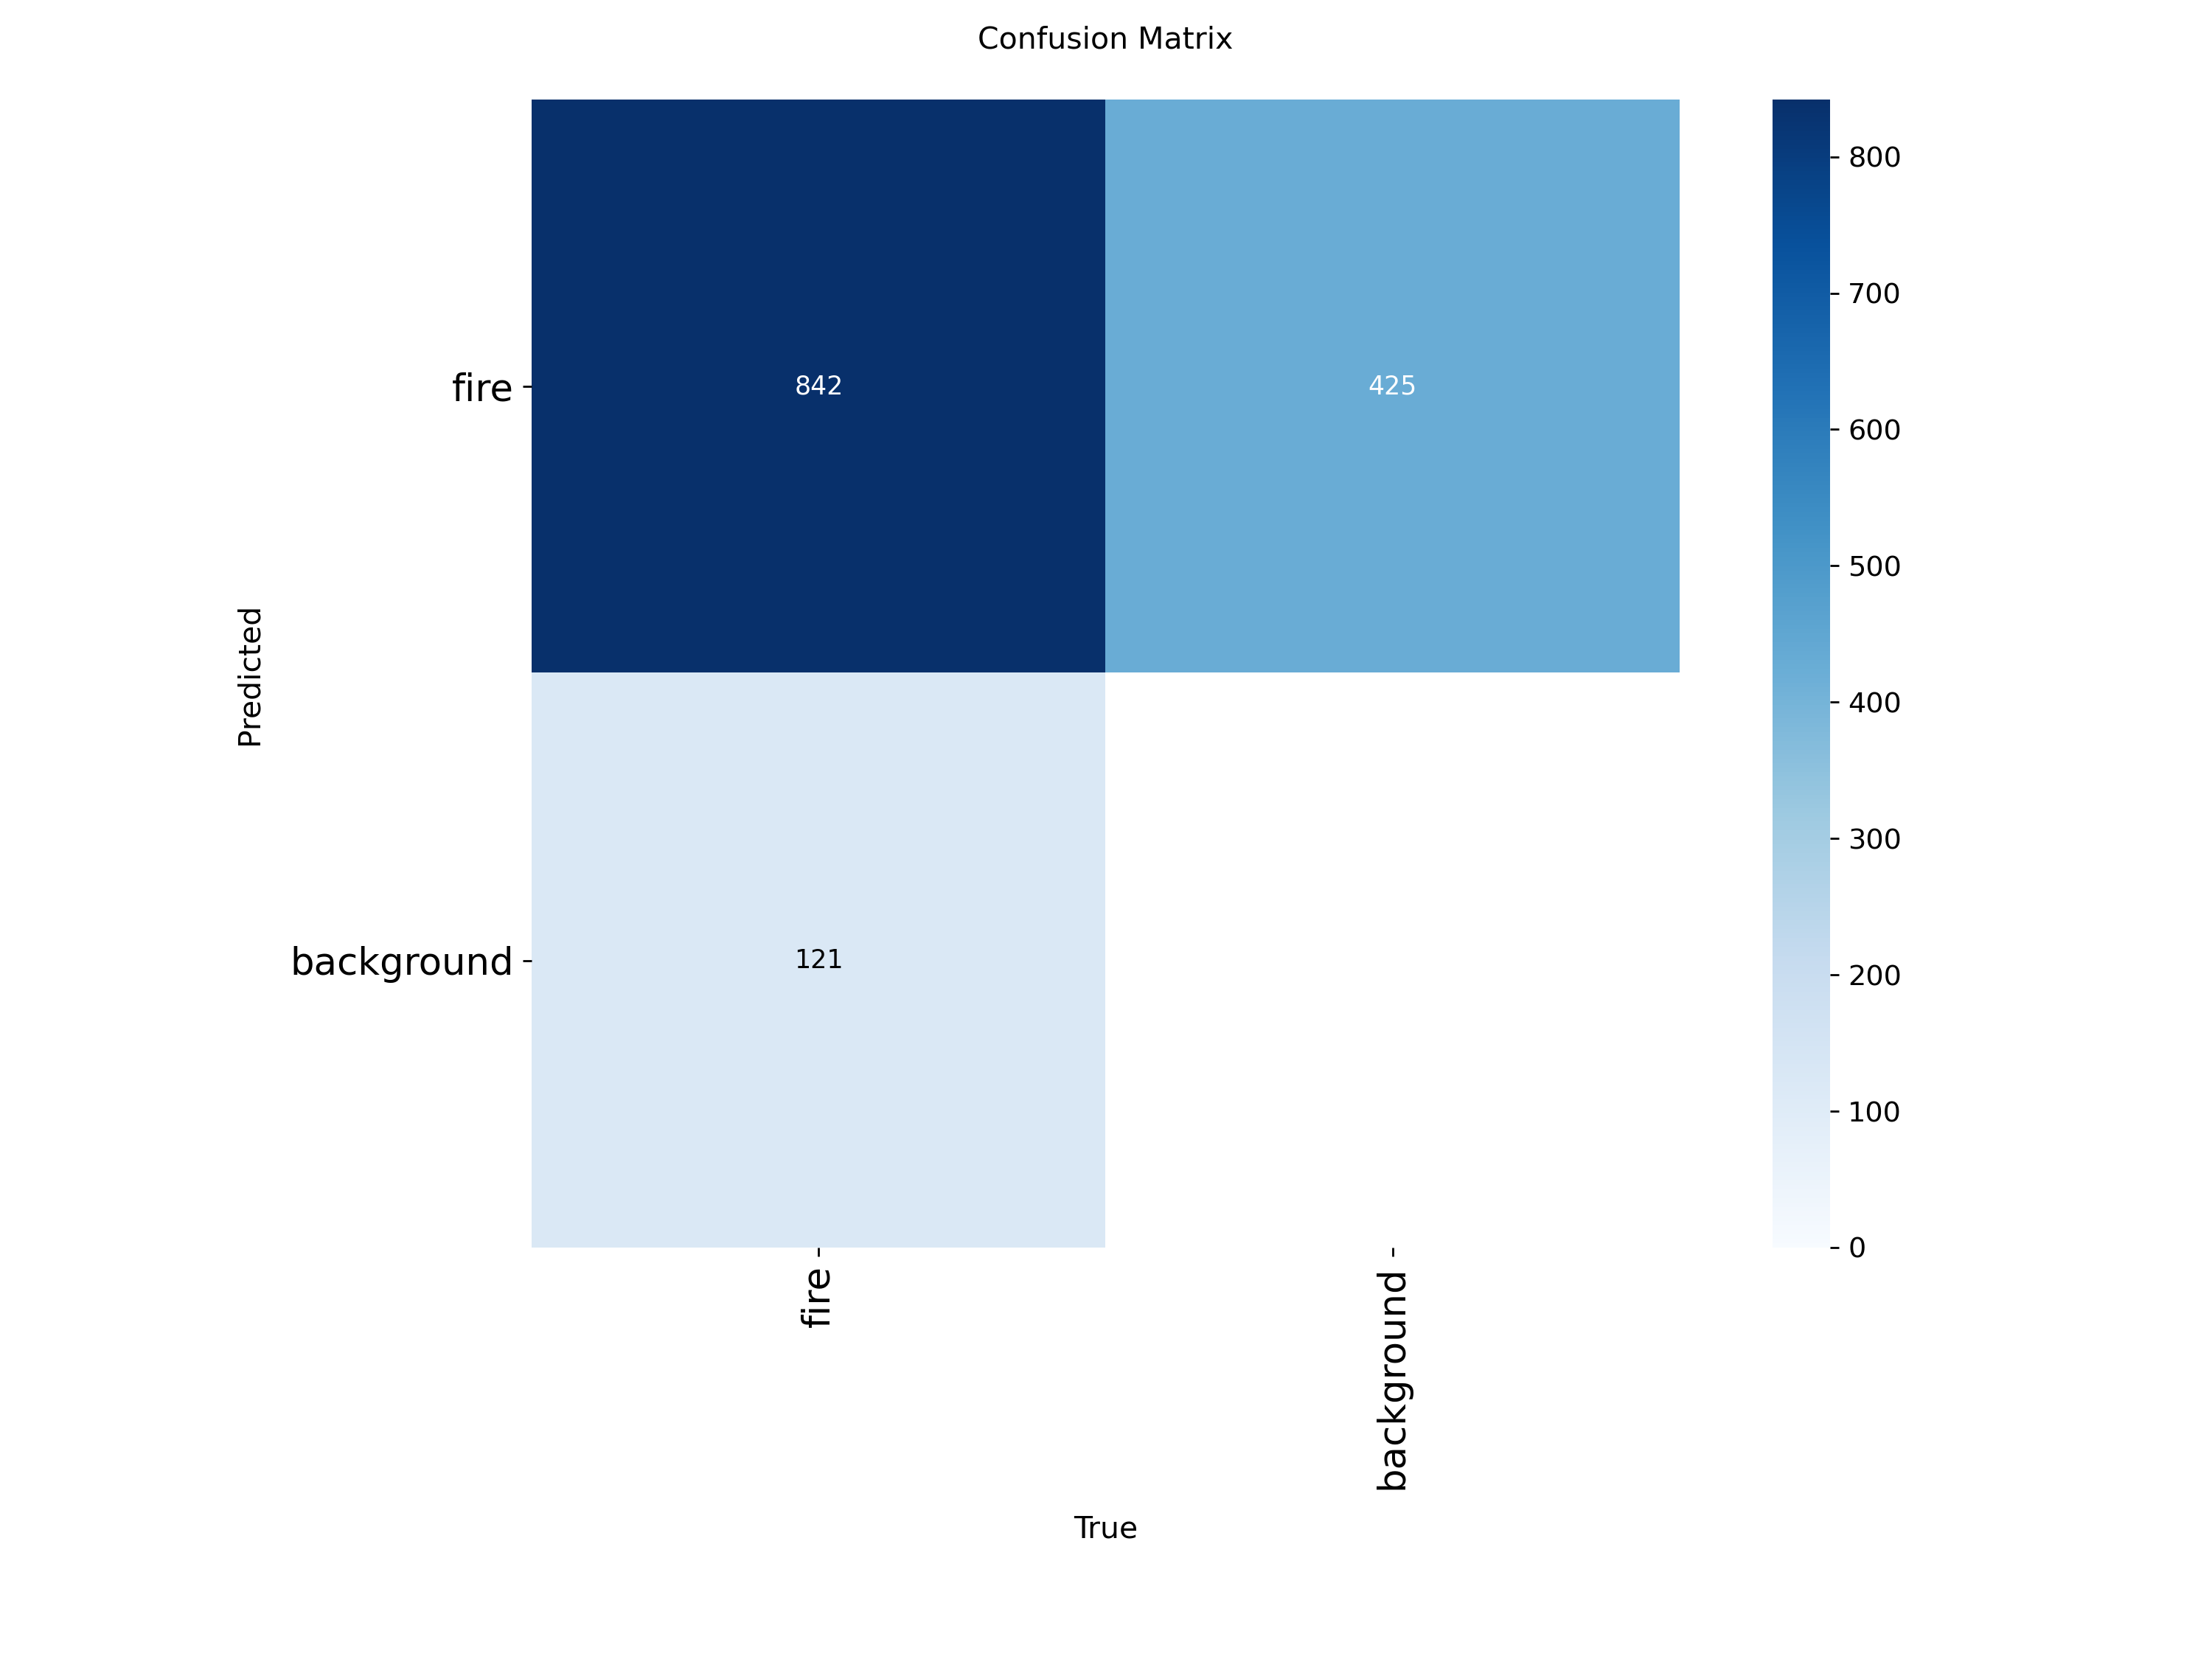

In [29]:
show_image("/workspace/ai_intern/PHAT/fire_detection/runs/detect/val/confusion_matrix.png")

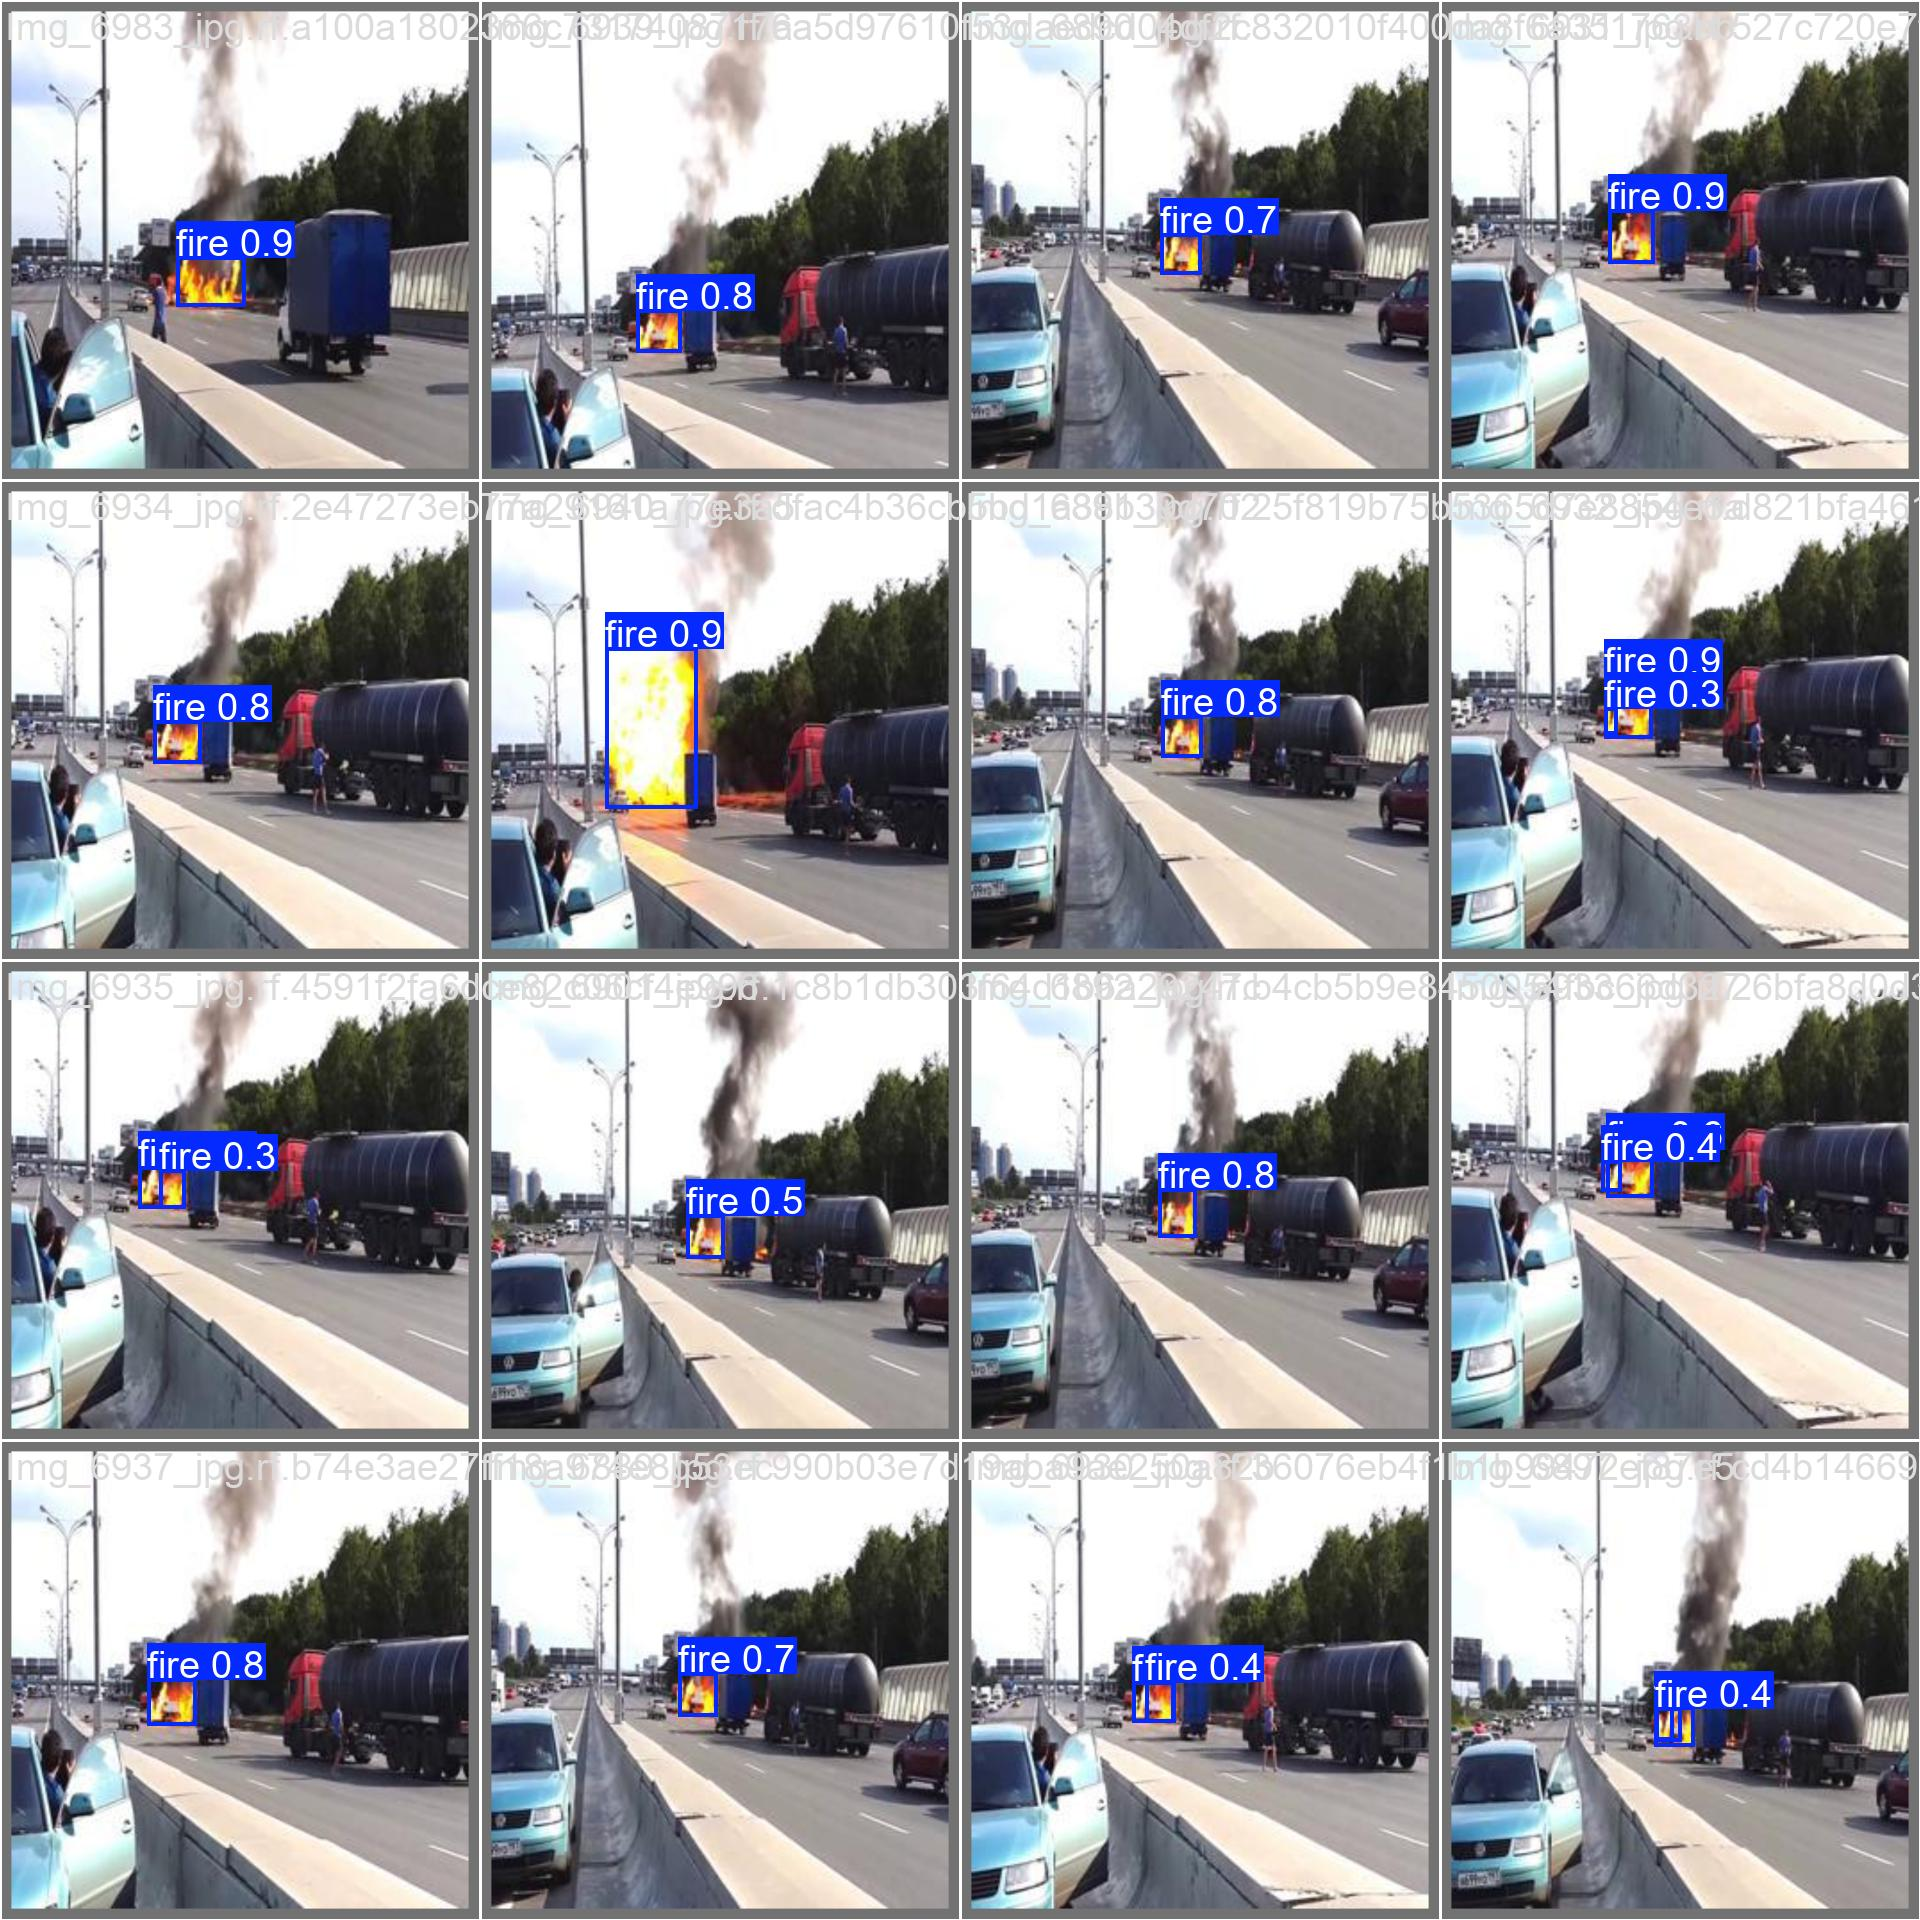

In [30]:
show_image('/workspace/ai_intern/PHAT/fire_detection/runs/detect/val/val_batch2_pred.jpg')